# Code Exercises

In [19]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

## 1. Correlation Exercises

Exercise 4-1.
Write a Python function that takes two vectors as input and provides two numbers as
output: the Pearson correlation coefficient and the cosine similarity value. Write code
that follows the formulas presented in this chapter; don’t simply call np.corrcoef and
spatial.distance.cosine. Check that the two output values are identical when the
variables are already mean centered and different when the variables are not mean
centered

In [20]:
def cosine_similarity(v : np.array, w :np.array) : 
    return np.dot(v, w) / (np.linalg.norm(v) * np.linalg.norm(w))

def correlation_coefficient(v :np.array, w :np.array) : 
    vm = v - np.mean(v)
    wm = w - np.mean(w)

    return np.dot(vm, wm) / (np.linalg.norm(vm) * np.linalg.norm(wm))

In [21]:
w = np.array([1, 2, 5, 7, 9])
v = np.array([20, 34, 90, 100, 500])

print(f'My solution: {correlation_coefficient(w, v)}')
print(f'Test: {np.corrcoef(w, v)}')

My solution: 0.8119909580328277
Test: [[1.         0.81199096]
 [0.81199096 1.        ]]


In [22]:
print(f'My solution: {cosine_similarity(v, w)}')
print(f'Test: {1 - cosine(w, v)}')

My solution: 0.87356556958993
Test: 0.8735655695899299


Exercise 4-2.
Let’s continue exploring the difference between correlation and cosine similarity.
Create a variable containing the integers 0 through 3, and a second variable equaling
the first variable plus some offset. You will then create a simulation in which you
systematically vary that offset between −50 and +50 (that is, the first iteration of the
simulation will have the second variable equal to [−50, −49, −48, −47]). In a for
loop, compute the correlation and cosine similarity between the two variables and
store these results. Then make a line plot showing how the correlation and cosine
similarity are affected by the mean offset. You should be able to reproduce Figure 4-4.

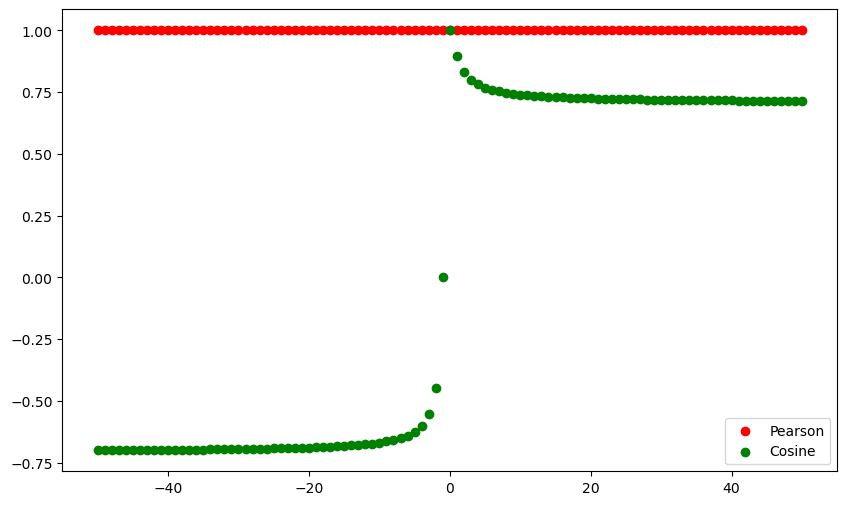

In [23]:
f_var = np.random.randint(low = 0, high = 3, size = 4)

plt.figure(figsize= (10, 6))
corr = []
cos = []
idx = [i for i in range(-50, 51)]
for i in range(-50, 51) : 
    s_var = f_var + i 
    corr.append(correlation_coefficient(f_var, s_var))
    cos.append(cosine_similarity(f_var, s_var))

plt.scatter(idx, corr, color = 'red', label = 'Pearson')
plt.scatter(idx, cos, color = 'green', label = 'Cosine')

plt.legend()
plt.show()


Exercise 4-3.
There are several Python functions to compute the Pearson correlation coefficient.
One of them is called pearsonr and is located in the stats module of the SciPy
library. Open the source code for this file (hint: ??functionname) and make sure you
understand how the Python implementation maps onto the formulas introduced in
this chapter

In [24]:
from scipy.stats import pearsonr

??pearsonr

Signature: pearsonr(x, y, *, alternative='two-sided', method=None)
Source:   
def pearsonr(x, y, *, alternative='two-sided', method=None):
    r"""
    Pearson correlation coefficient and p-value for testing non-correlation.

    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.

    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability of an uncorrelat

Exercise 4-4.
Why do you ever need to code your own functions when they already exist in Python?
Part of the reason is that writing your own functions has huge educational value,
because you see that (in this case) the correlation is a simple computation and not some
incredibly sophisticated black-box algorithm that only a computer-science PhD could
understand. But another reason is that built-in functions are sometimes slower because
of myriad input checks, dealing with additional input options, converting data types,
etc. This increases usability but at the expense of computation time.
Your goal in this exercise is to determine whether your own bare-bones correla‐
tion function is faster than NumPy’s corrcoef function. Modify the function from
Exercise 4-2 to compute only the correlation coefficient. Then, in a for loop over
1,000 iterations, generate two variables of 500 random numbers and compute the
correlation between them. Time the for loop. Then repeat but using np.corrcoef.
In my tests, the custom function was about 33% faster than np.corrcoef. In these
toy examples, the differences are measured in milliseconds, but if you are running
billions of correlations with large datasets, those milliseconds really add up! (Note
that writing your own functions without input checks has the risk of input errors that
would be caught by np.corrcoef.) (Also note that the speed advantage breaks down
for larger vectors. Try it!)

In [25]:
import time 

numIters = 1000
var_len = 500 

begin = time.time()

for i in range(numIters) : 
    x = np.random.randn(var_len, 2)
    g = correlation_coefficient(x[:,0], x[:, 1])
print(f'Time use my function {time.time() - begin}')

begin = time.time()

for i in range(numIters) : 
    x = np.random.randn(var_len, 2)
    g = np.corrcoef(x[:, 0], x[:, 1])
print(f'Time use numpy function: {time.time() - begin}')

Time use my function 0.0500493049621582
Time use numpy function: 0.08702635765075684


## 2. Filtering and feature detection

Exercise 4-5.
Let’s build an edge detector. The kernel for an edge detector is very simple: [−1 +1].
The dot product of that kernel with a snippet of a time series signal with constant
value (e.g., [10 10]) is 0. But that dot product is large when the signal has a steep
change (e.g., [1 10] would produce a dot product of 9). The signal we’ll work with is
a plateau function. Graphs A and B in Figure 4-5 show the kernel and the signal. The
first step in this exercise is to write code that creates these two time series.
Next, write a for loop over the time points in the signal. At each time point, compute
the dot product between the kernel and a segment of the time series data that has
the same length as the kernel. You should produce a plot that looks like graph C in
Figure 4-5. (Focus more on the result than on the aesthetics.) Notice that our edge
detector returned 0 when the signal was flat, +1 when the signal jumped up, and −1
when the signal jumped down.
Feel free to continue exploring this code. For example, does anything change if you
pad the kernel with zeros ([0 −1 1 0])? What about if you flip the kernel to be [1 −1]?
How about if the kernel is asymmetric ([−1 2])?

In [26]:
kernel = np.array([-1, 1])

time_series = np.zeros(30)
time_series[10:20] = 1 

feature = np.zeros(29)

for i in range(len(feature)) :
    feature[i] = np.dot(kernel, time_series[i : i + 2])


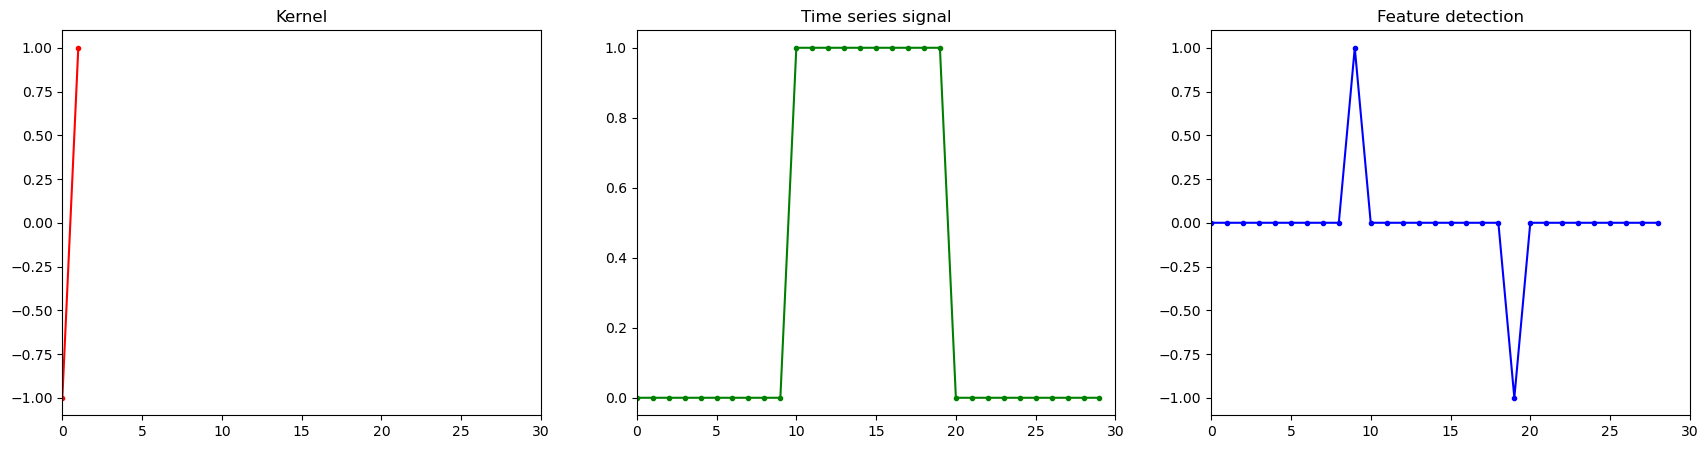

In [27]:
fig, ax = plt.subplots(nrows= 1, ncols= 3, figsize = (21, 5))

ax[0].plot(kernel, '.-r')
ax[0].set_title('Kernel')
ax[0].set_xlim([0, 30])

ax[1].plot(time_series, '.-g')
ax[1].set_title('Time series signal')
ax[1].set_xlim([0, 30])

ax[2].plot(feature, '.-b')
ax[2].set_title('Feature detection')
ax[2].set_xlim([0, 30])

plt.show()

Exercise 4-6.
Now we will repeat the same procedure but with a different signal and kernel. The
goal will be to smooth a rugged time series. The time series will be 100 random
numbers generated from a Gaussian distribution (also called a normal distribution).
The kernel will be a bell-shaped function that approximates a Gaussian function,
defined as the numbers [0, .1, .3, .8, 1, .8, .3, .1, 0] but scaled so that the sum over
the kernel is 1. Your kernel should match graph A in Figure 4-6, although your signal
won’t look exactly like graph B due to random numbers.
Copy and adapt the code from the previous exercise to compute the sliding time ser‐
ies of dot products—the signal filtered by the Gaussian kernel. Warning: be mindful
of the indexing in the for loop. Graph C in Figure 4-6 shows an example result. You
can see that the filtered signal is a smoothed version of the original signal. This is also
called low-pass filtering.


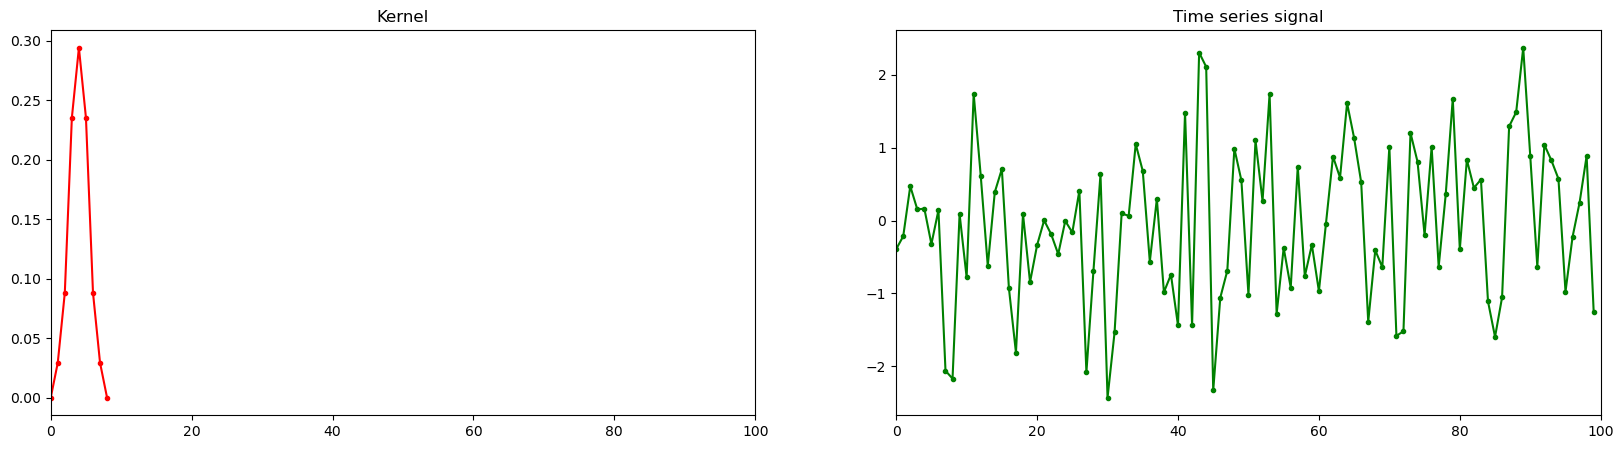

In [28]:
kernel = np.array([0, .1, .3 , .8, 1, .8, .3, .1, 0])
t = sum(kernel)
kernel = kernel / t

time_series = np.random.randn(100)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5) )
ax[0].plot(kernel, '.-r')
ax[0].set_title("Kernel")
ax[0].set_xlim([0, 100])

ax[1].plot(time_series, '.-g')
ax[1].set_title("Time series signal")
ax[1].set_xlim([0, 100])

plt.show()

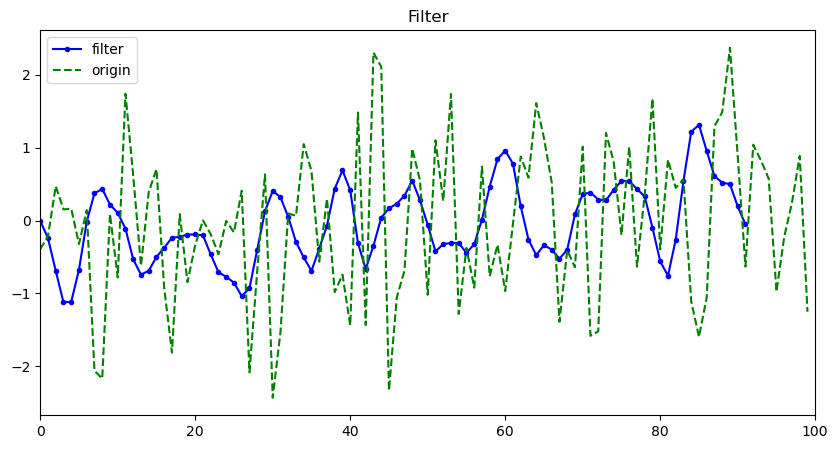

In [29]:
filtering = np.zeros(100 - len(kernel) + 1)

for i in range(len(filtering)) : 
    filtering[i] = np.dot(kernel, time_series[i : i + len(kernel)])


fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(filtering, '.-b', label = 'filter')
ax.plot(time_series, '--g', label = 'origin')
ax.set_title("Filter")
ax.set_xlim([0, 100])

plt.legend()
plt.show()